# **Ethical Implications of Data Shifts in AI and Algorithms**

**TEAM 8**

Team Members: *Madhumitha Sriram , Prudhvi Raju, Xiang Liu, Yanqi Su, Yile Xu, Yiwen Zhu*

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import plotly.express as px
import warnings
import folium
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
import scipy.stats as stats
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
pip install opendatasets

#Data Preprocessing

##Loading Dataset

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/asaniczka/san-francisco-police-stop-data-2018-2023')

Skipping, found downloaded files in "./san-francisco-police-stop-data-2018-2023" (use force=True to force download)


In [ ]:
missing_values = ["NA", "n/a", "-", "unknown", " "]

data = pd.read_csv('san-francisco-police-stop-data-2018-2023/SFPD_stop_cleaned_data.csv', na_values=missing_values)
data['stop_datetime'] = pd.to_datetime(data['stop_datetime'], errors='coerce')

data.head(2)

,doj_record_id,person_number,agency_ori,stop_datetime,duration_of_stop,is_stop_response_to_call,location,district,city,perceived_race_ethnicity,...,perceived_gender_code,perceived_or_known_disability_code,reason_for_stop_code,actions_taken_code,basis_for_search_code,basis_for_property_seizure_code,type_of_property_seized_code,contraband_or_evidence_code,suspicion_sub_type_code,results_of_stop_code
0,U3801210950BC4735479,1,CA0380100,2021-04-05 13:10:00,90,True,Terminal 2 departure level,Airport,UNINCORPORATED AREA-SAN MATEO COUNTY,White,...,1,8,2,"16,20,21",5,3,"1,2,3","2,3,4",2,4
1,U380119317C3E8C5B763,2,CA0380100,2019-11-12 23:36:00,70,False,100 Block of Post St,CENTRAL,SAN FRANCISCO,White,...,1,8,1,"1,2,4,18,21","2,5,10",4,"1,7",2,NaN,5


In [ ]:
data.isna().sum()

doj_record_id                              0
person_number                              0
agency_ori                                 0
stop_datetime                              0
duration_of_stop                           0
is_stop_response_to_call                   0
location                                  53
district                                   8
city                                      55
perceived_race_ethnicity                   0
perceived_gender                           0
is_lgbt                                    0
perceived_age                              0
perceived_age_group                      601
had_limited_or_no_english                  0
perceived_or_known_disability         240704
reason_for_stop                          669
traffic_violation_type                 98079
traffic_viol_cjis_off_code                 0
traffic_viol_off_code                  98098
traffic_viol_off_statute               98098
suspicion_cjis_off_code                    0
suspicion_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250093 entries, 0 to 250092
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   doj_record_id                       250093 non-null  object        
 1   person_number                       250093 non-null  int64         
 2   agency_ori                          250093 non-null  object        
 3   stop_datetime                       250093 non-null  datetime64[ns]
 4   duration_of_stop                    250093 non-null  int64         
 5   is_stop_response_to_call            250093 non-null  bool          
 6   location                            250040 non-null  object        
 7   district                            250085 non-null  object        
 8   city                                250038 non-null  object        
 9   perceived_race_ethnicity            250093 non-null  object        
 10  perceive

##Null Values

In [ ]:
total_entries = np.product(data.shape)

total_nan_values = data.isnull().sum().sum()
print(f"Total number of NaN values in the dataset: {total_nan_values}")


nan_values_per_column = data.isnull().sum()
total_nan_percentage = (total_nan_values / total_entries) * 100
print(f"Percentage of NaN values in the dataset: {total_nan_percentage:.2f}%")
nan_values_per_column = data.isnull().sum()
nan_percentage_per_column = (nan_values_per_column / len(data)) * 100

print("Number and percentage of NaN values per column:")
print(pd.DataFrame({
    "Number of NaNs": nan_values_per_column,
    "Percentage of NaNs": nan_percentage_per_column
}))

Total number of NaN values in the dataset: 3041401
Percentage of NaN values in the dataset: 26.44%
Number and percentage of NaN values per column:
                                    Number of NaNs  Percentage of NaNs
doj_record_id                                    0            0.000000
person_number                                    0            0.000000
agency_ori                                       0            0.000000
stop_datetime                                    0            0.000000
duration_of_stop                                 0            0.000000
is_stop_response_to_call                         0            0.000000
location                                        53            0.021192
district                                         8            0.003199
city                                            55            0.021992
perceived_race_ethnicity                         0            0.000000
perceived_gender                                 0            0.000000
i

In [ ]:
nan_values_per_column = data.isnull().sum()
nan_percentage_per_column = (nan_values_per_column / len(data)) * 100

print("Number and percentage of NaN values per column:")
print(pd.DataFrame({
    "Number of NaNs": nan_values_per_column,
    "Percentage of NaNs": nan_percentage_per_column
}))

Number and percentage of NaN values per column:
                                    Number of NaNs  Percentage of NaNs
doj_record_id                                    0            0.000000
person_number                                    0            0.000000
agency_ori                                       0            0.000000
stop_datetime                                    0            0.000000
duration_of_stop                                 0            0.000000
is_stop_response_to_call                         0            0.000000
location                                        53            0.021192
district                                         8            0.003199
city                                            55            0.021992
perceived_race_ethnicity                         0            0.000000
perceived_gender                                 0            0.000000
is_lgbt                                          0            0.000000
perceived_age                

##Data Preprocessing

In [ ]:
columns_to_drop = [
    'perceived_race_ethnicity_code', 'perceived_gender_code', 'perceived_or_known_disability_code',
    'reason_for_stop_code', 'actions_taken_code', 'basis_for_search_code', 'basis_for_property_seizure_code',
    'type_of_property_seized_code', 'contraband_or_evidence_code', 'suspicion_sub_type_code', 'results_of_stop_code',
    'longitude', 'latitude', 'perceived_or_known_disability', 'suspicion_off_code_txt', 'suspicion_off_statute', 'suspicion_sub_type',
    'actions_taken', 'basis_for_search', 'basis_for_property_seizure', 'type_of_property_seized', 'contraband_or_evidence', 'traffic_violation_type',
    'traffic_viol_off_code', 'traffic_viol_off_statute', 'analysis_neighborhoods', 'doj_record_id', 'agency_ori'
]

data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
nan_values_per_column = data.isnull().sum()
nan_percentage_per_column = (nan_values_per_column / len(data)) * 100

print("Number and percentage of NaN values per column:")
print(pd.DataFrame({
    "Number of NaNs": nan_values_per_column,
    "Percentage of NaNs": nan_percentage_per_column
}))

Number and percentage of NaN values per column:
                            Number of NaNs  Percentage of NaNs
person_number                            0            0.000000
stop_datetime                            0            0.000000
duration_of_stop                         0            0.000000
is_stop_response_to_call                 0            0.000000
location                                53            0.021192
district                                 8            0.003199
city                                    55            0.021992
perceived_race_ethnicity                 0            0.000000
perceived_gender                         0            0.000000
is_lgbt                                  0            0.000000
perceived_age                            0            0.000000
perceived_age_group                    601            0.240311
had_limited_or_no_english                0            0.000000
reason_for_stop                        669            0.267500
traffic

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data[['perceived_race_ethnicity', 'perceived_gender', 'is_lgbt', 'results_of_stop', 'stop_datetime']]

In [ ]:
data_2018_2019 = data[data['stop_datetime'].dt.year.isin([2018, 2019])]
data_2020_2021 = data[data['stop_datetime'].dt.year.isin([2020, 2021])]
data_2022_2023 = data[data['stop_datetime'].dt.year.isin([2022, 2023])]

In [ ]:
print('Counts 2018-2019:', data_2018_2019.shape[0])
print('Counts 2020-2021:', data_2020_2021.shape[0])
print('Counts 2022-2023:', data_2022_2023.shape[0])

Counts 2018-2019: 159154
Counts 2020-2021: 66277
Counts 2022-2023: 23971


#Whole data set EDA

In [ ]:
data['stop_datetime'] = pd.to_datetime(data['stop_datetime'])
data['year'] = data['stop_datetime'].dt.year

def assign_year_group(year):
    if year in [2018, 2019]:
        return '2018-2019'
    elif year in [2020, 2021]:
        return '2020-2021'
    elif year in [2022, 2023]:
        return '2022-2023'
    else:
        return None

data['year_group'] = data['year'].apply(assign_year_group)

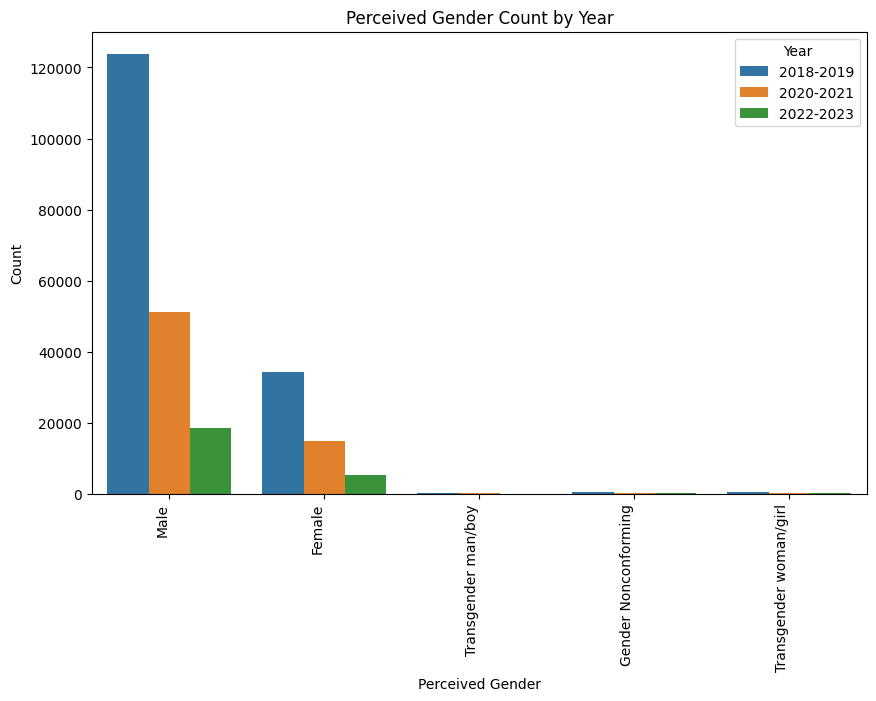

In [ ]:
data_srt=data.sort_values(by='year_group')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='perceived_gender', hue='year_group', data=data_srt)
plt.title('Perceived Gender Count by Year')
plt.xlabel('Perceived Gender')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Year')
plt.show()


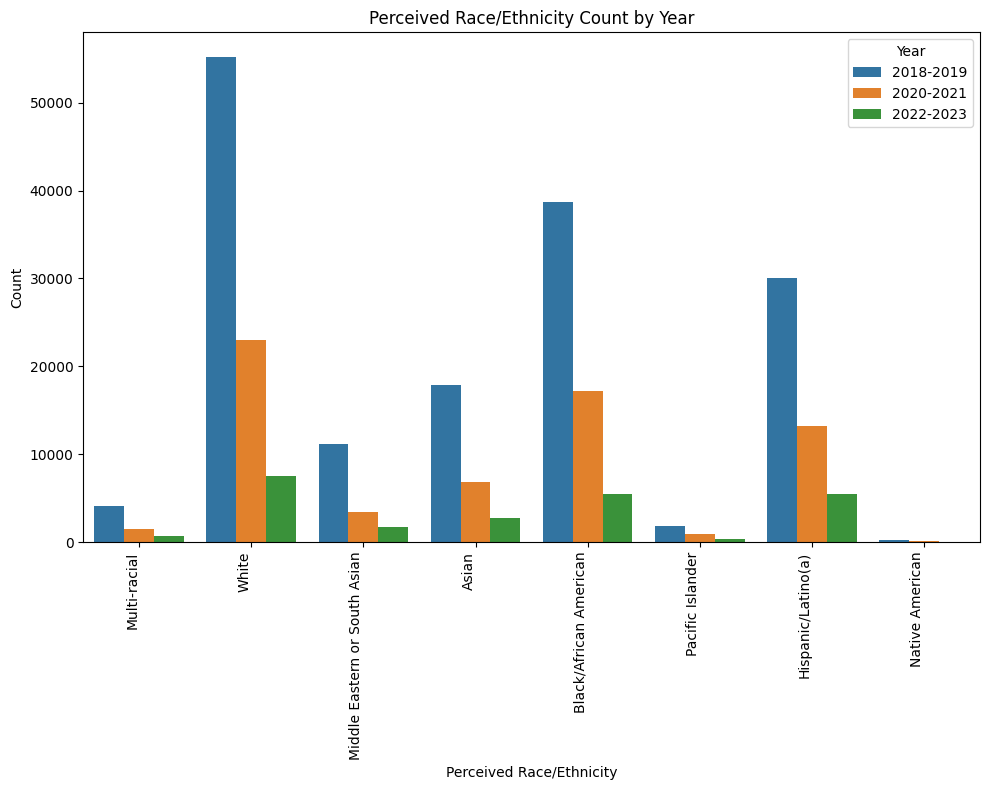

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='perceived_race_ethnicity', hue='year_group', data=data_srt)
plt.title('Perceived Race/Ethnicity Count by Year')
plt.xlabel('Perceived Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

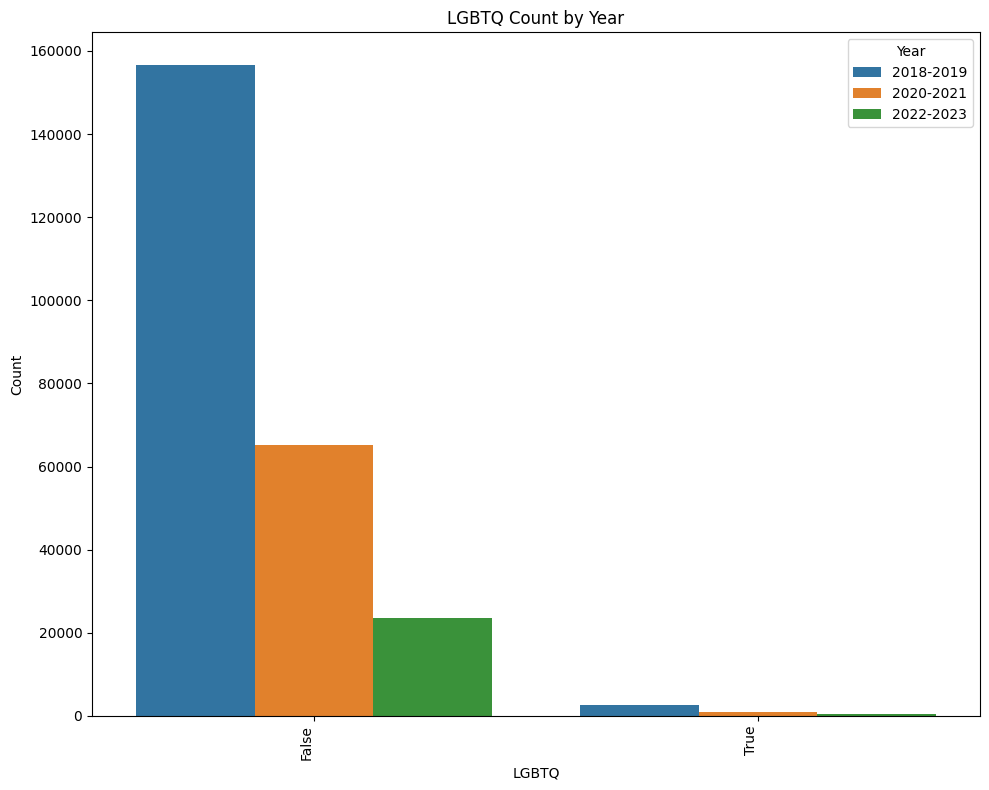

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='is_lgbt', hue='year_group', data=data_srt)
plt.title('LGBTQ Count by Year')
plt.xlabel('LGBTQ')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#Sampled Dataset EDA

In [ ]:
target_samples = data_2022_2023.shape[0]

def multi_stratified_downsample(df, target_count):
    grouping_columns = ['perceived_gender', 'perceived_race_ethnicity', 'is_lgbt']
    group_counts = df.groupby(grouping_columns).size()
    total_count = df.shape[0]
    group_proportions = group_counts / total_count
    target_group_counts = (group_proportions * target_count).round().astype(int)
    downsampled_df = pd.DataFrame()
    for group, count in target_group_counts.items():
        group_subset = df[(df[grouping_columns[0]] == group[0]) &
                          (df[grouping_columns[1]] == group[1]) &
                          (df[grouping_columns[2]] == group[2])]
        downsampled_subset = group_subset.sample(n=min(count, len(group_subset)), random_state=1)
        downsampled_df = pd.concat([downsampled_df, downsampled_subset], ignore_index=True)

    return downsampled_df

downsampled_2018_2019 = multi_stratified_downsample(data_2018_2019, target_samples)
downsampled_2020_2021 = multi_stratified_downsample(data_2020_2021, target_samples)

print('Downsampled 2018-2019:', downsampled_2018_2019.shape[0])
print('Downsampled 2020-2021:', downsampled_2020_2021.shape[0])

Downsampled 2018-2019: 23968
Downsampled 2020-2021: 23971


In [ ]:
print('Distribution in downsampled 2018-2019:')
print(downsampled_2018_2019.groupby(['perceived_gender', 'perceived_race_ethnicity', 'is_lgbt']).size().reset_index(name='Counts'))

Distribution in downsampled 2018-2019:
          perceived_gender       perceived_race_ethnicity  is_lgbt  Counts
0                   Female                          Asian    False     672
1                   Female                          Asian     True       6
2                   Female         Black/African American    False    1299
3                   Female         Black/African American     True      22
4                   Female             Hispanic/Latino(a)    False     765
5                   Female             Hispanic/Latino(a)     True      13
6                   Female  Middle Eastern or South Asian    False     107
7                   Female  Middle Eastern or South Asian     True       1
8                   Female                   Multi-racial    False     107
9                   Female                   Multi-racial     True       1
10                  Female                Native American    False       8
11                  Female               Pacific Islander    

In [ ]:
print('Distribution in downsampled 2020-2021:')
print(downsampled_2020_2021.groupby(['perceived_gender', 'perceived_race_ethnicity', 'is_lgbt']).size().reset_index(name='Counts'))

Distribution in downsampled 2020-2021:
          perceived_gender       perceived_race_ethnicity  is_lgbt  Counts
0                   Female                          Asian    False     681
1                   Female                          Asian     True       5
2                   Female         Black/African American    False    1463
3                   Female         Black/African American     True      22
4                   Female             Hispanic/Latino(a)    False     799
5                   Female             Hispanic/Latino(a)     True      13
6                   Female  Middle Eastern or South Asian    False     110
7                   Female  Middle Eastern or South Asian     True       1
8                   Female                   Multi-racial    False      98
9                   Female                   Multi-racial     True       1
10                  Female                Native American    False       8
11                  Female                Native American    

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_bar(data, title):
    pivoted_data = data.pivot_table(index=['perceived_race_ethnicity', 'is_lgbt'], columns='perceived_gender', values='Counts', fill_value=0)
    pivoted_data.plot(kind='bar', stacked=True, figsize=(10, 8))
    plt.title(title)
    plt.xlabel('Perceived Race/Ethnicity, LGBT Status')
    plt.ylabel('Counts')
    plt.xticks(rotation=90, ha='right')
    plt.legend(title='Perceived Gender')
    plt.tight_layout()
    plt.show()


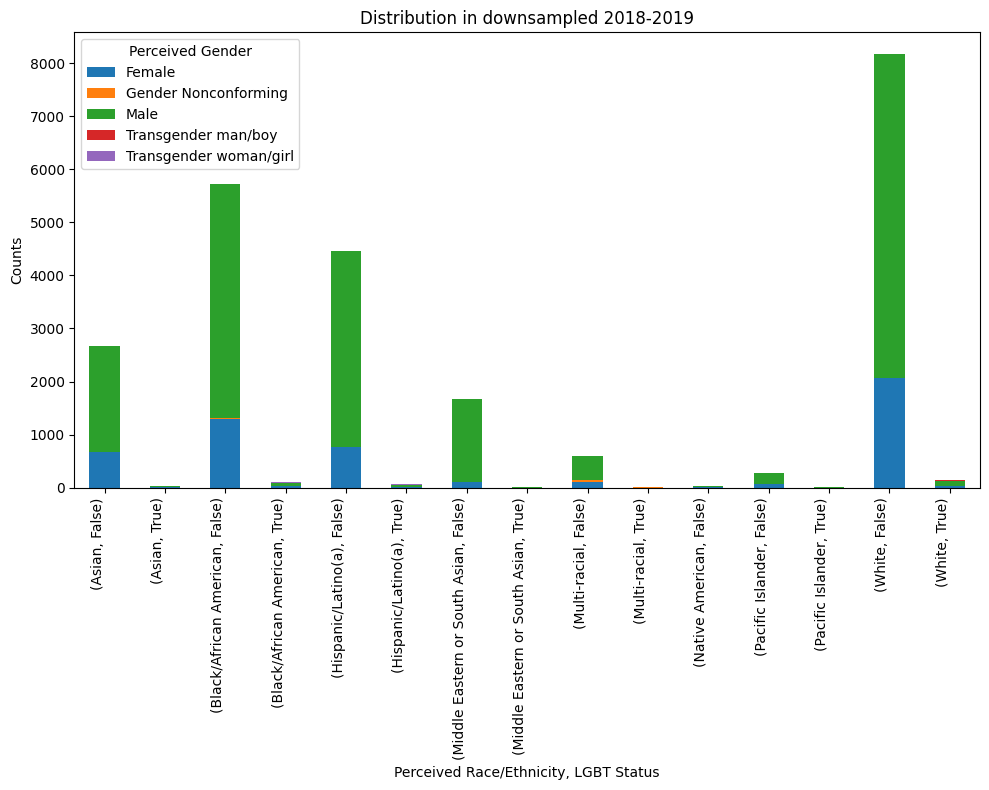

In [ ]:
plot_stacked_bar(downsampled_2018_2019.groupby(['perceived_race_ethnicity',
                                                'is_lgbt', 'perceived_gender']).size().reset_index(name='Counts'),
                 'Distribution in downsampled 2018-2019')

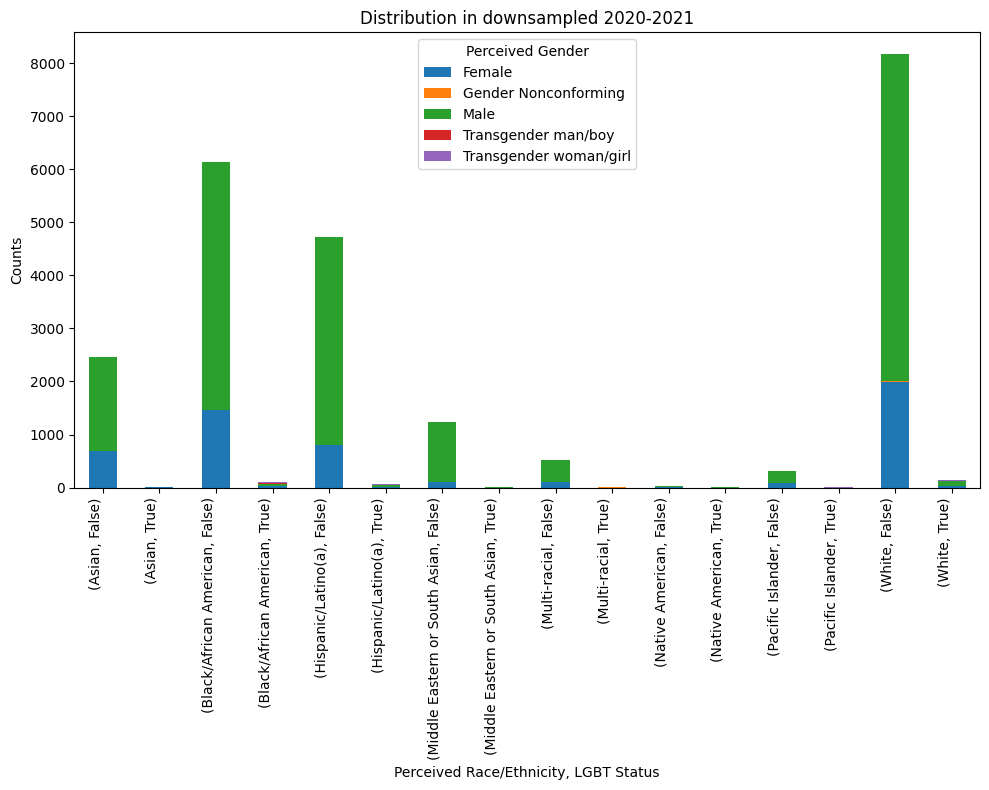

In [ ]:
plot_stacked_bar(downsampled_2020_2021.groupby(['perceived_race_ethnicity',
                                                'is_lgbt', 'perceived_gender']).size().reset_index(name='Counts'),
                                                'Distribution in downsampled 2020-2021')


#Statistics Tests

##Chi square

In [ ]:
race_2018_2019 = downsampled_2018_2019['perceived_race_ethnicity']
race_2020_2021 = downsampled_2020_2021['perceived_race_ethnicity']
race_2022_2023 = data_2022_2023['perceived_race_ethnicity']

gender_2018_2019 = downsampled_2018_2019['perceived_gender']
gender_2020_2021 = downsampled_2020_2021['perceived_gender']
gender_2022_2023 = data_2022_2023['perceived_gender']

lgbt_2018_2019 = downsampled_2018_2019['is_lgbt']
lgbt_2020_2021 = downsampled_2020_2021['is_lgbt']
lgbt_2022_2023 = data_2022_2023['is_lgbt']

variables = [
    ('Race 2018-2019 vs 2020-2021', race_2018_2019, race_2020_2021),
    ('Race 2018-2019 vs 2022-2023', race_2018_2019, race_2022_2023),
    ('Gender 2018-2019 vs 2020-2021', gender_2018_2019, gender_2020_2021),
    ('Gender 2018-2019 vs 2022-2023', gender_2018_2019, gender_2022_2023),
    ('LGBT 2018-2019 vs 2020-2021', lgbt_2018_2019, lgbt_2020_2021),
    ('LGBT 2018-2019 vs 2022-2023', lgbt_2018_2019, lgbt_2022_2023)
]

results_list = []

for comparison, var1, var2 in variables:
    contingency_table = pd.crosstab(var1, var2)
    chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    critical_value = stats.chi2.ppf(1 - alpha, dof)
    data_shift = (p_val < alpha) or (chi2_stat > critical_value)
    results_list.append({'Comparison': comparison, 'Chi-Square Statistic': chi2_stat,
                         'P-value': p_val, 'Degrees of Freedom': dof, 'Critical Value': critical_value,
                         'Data Shift': data_shift})

results_df = pd.DataFrame(results_list)
results_df

,Comparison,Chi-Square Statistic,P-value,Degrees of Freedom,Critical Value,Data Shift
0,Race 2018-2019 vs 2020-2021,96153.190914,0.000000,49,66.338649,True
1,Race 2018-2019 vs 2022-2023,70.927154,0.021904,49,66.338649,True
2,Gender 2018-2019 vs 2020-2021,57042.612166,0.000000,16,26.296228,True
3,Gender 2018-2019 vs 2022-2023,16.118636,0.444712,16,26.296228,False
4,LGBT 2018-2019 vs 2020-2021,4425.437556,0.000000,1,3.841459,True
5,LGBT 2018-2019 vs 2022-2023,0.000000,1.000000,1,3.841459,False


<Figure size 1200x800 with 0 Axes>

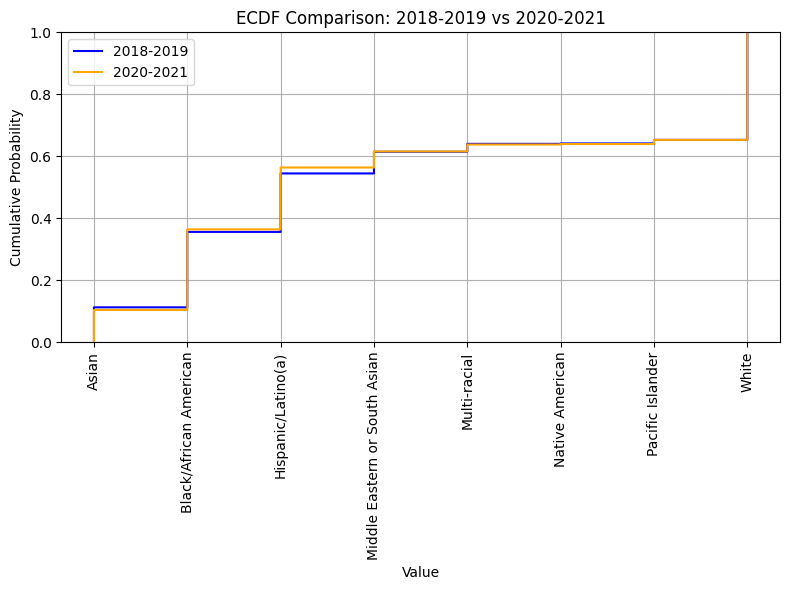

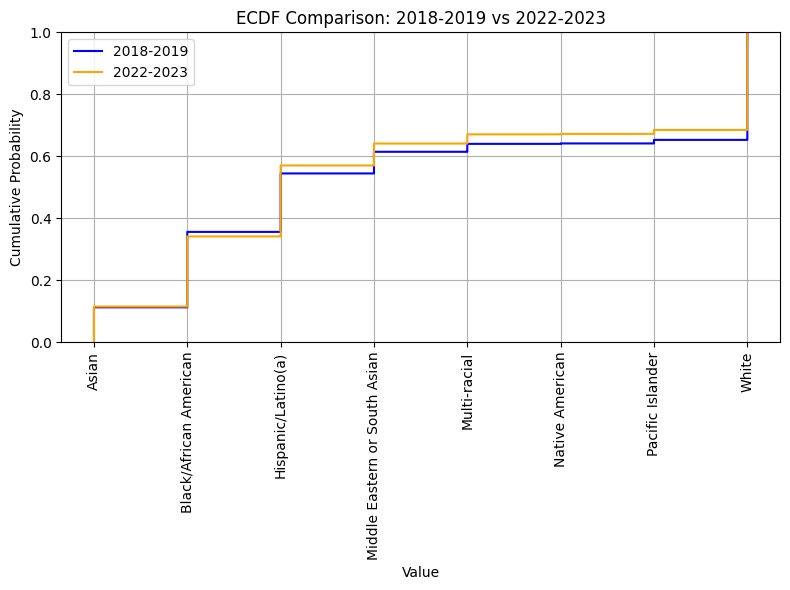

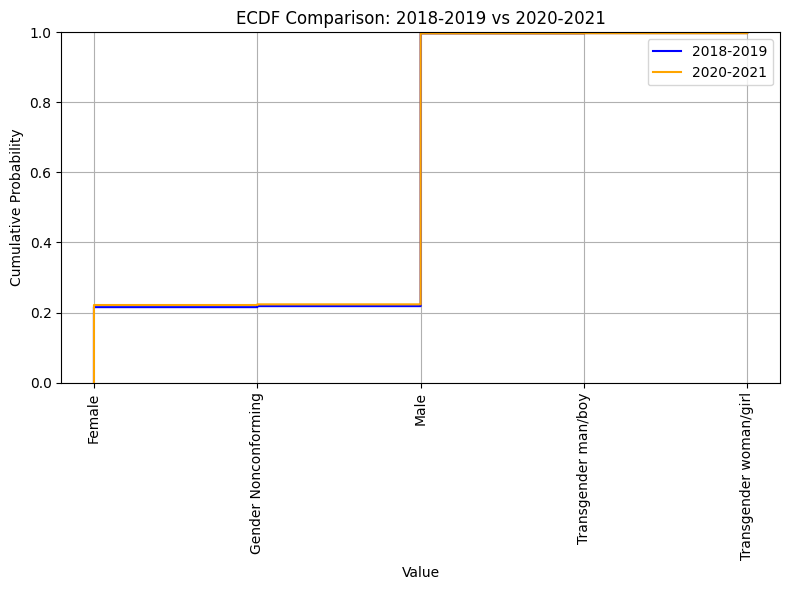

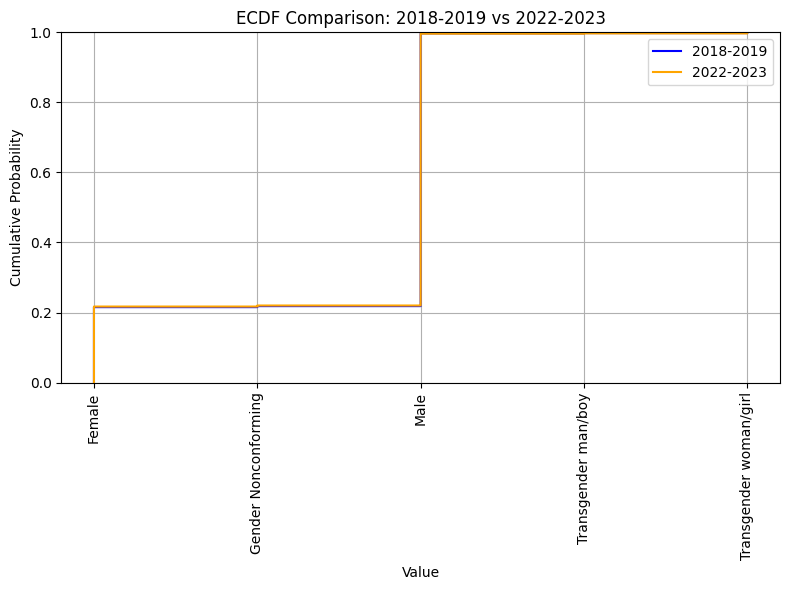

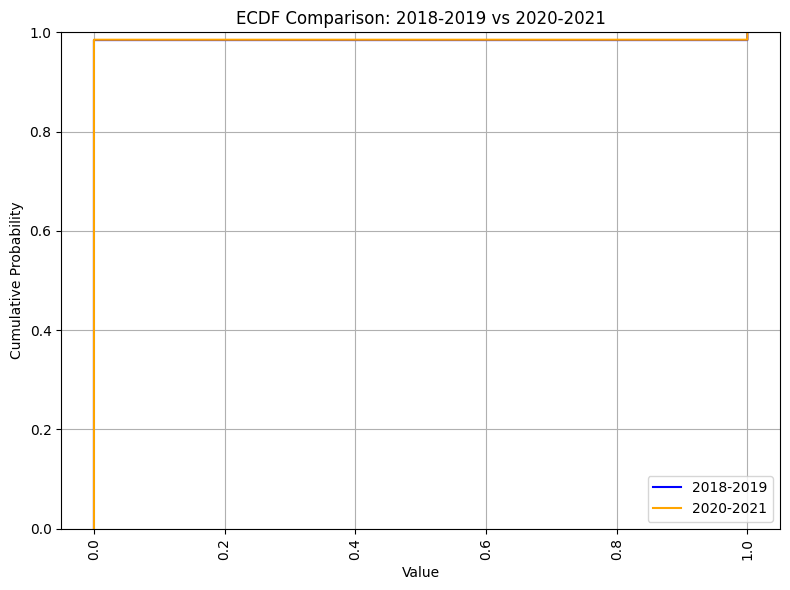

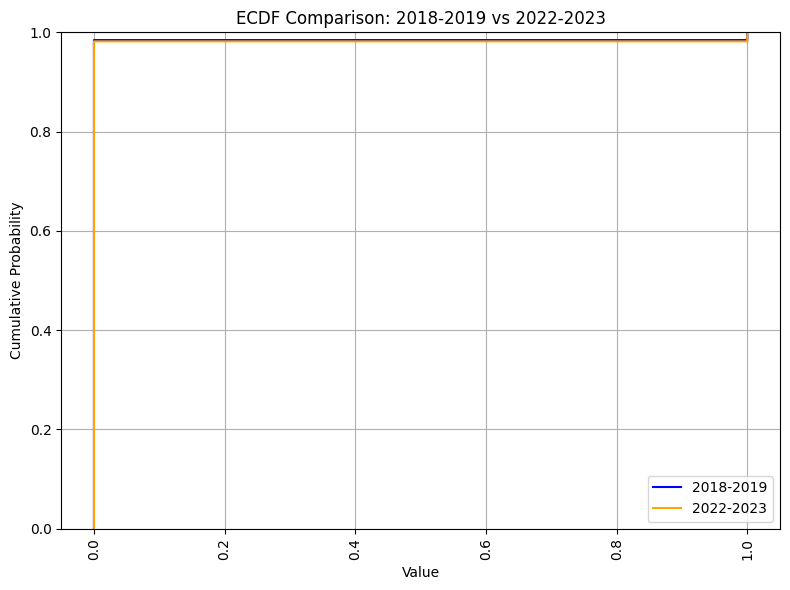

In [ ]:
plt.figure(figsize=(12, 8))

for i, (comparison, var1, var2) in enumerate(variables, 1):
    plt.figure(figsize=(8, 6))
    var1_label = comparison.split()[1]
    var2_label = comparison.split()[3]

    plt.title(f'ECDF Comparison: {var1_label} vs {var2_label}')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.xticks(rotation=90)
    plt.grid(True)

    sns.ecdfplot(var1, label=var1_label, color='blue')
    sns.ecdfplot(var2, label=var2_label, color='orange')

    plt.legend()
    plt.tight_layout()
    plt.show()


##KS Test

In [ ]:
race_2018_2019 = downsampled_2018_2019['perceived_race_ethnicity']
race_2020_2021 = downsampled_2020_2021['perceived_race_ethnicity']
stat_race, pval_race = ks_2samp(race_2018_2019, race_2020_2021)

print('K-S statistic:', stat_race)
print('P-value:', pval_race)

K-S statistic: 0.019121712573364813
P-value: 0.00030826833438288255


In [ ]:
race_2018_2019 = downsampled_2018_2019['perceived_race_ethnicity']
race_2022_2023 = data_2022_2023['perceived_race_ethnicity']
stat_race2, pval_race2 = ks_2samp(race_2018_2019, race_2022_2023)

print('K-S statistic:', stat_race2)
print('P-value:', pval_race2)

K-S statistic: 0.03212388464610583
P-value: 3.522767529546918e-11


In [ ]:
gender_2018_2019 = downsampled_2018_2019['perceived_gender']
gender_2020_2021 = downsampled_2020_2021['perceived_gender']
stat_gender, pval_gender = ks_2samp(gender_2018_2019, gender_2020_2021)

print('K-S statistic:', stat_gender)
print('P-value:', pval_gender)

K-S statistic: 0.006105450892792769
P-value: 0.7605538057792443


In [ ]:
gender_2018_2019 = downsampled_2018_2019['perceived_gender']
gender_2022_2023 = data_2022_2023['perceived_gender']
stat_gender2, pval_gender2 = ks_2samp(gender_2018_2019, gender_2022_2023)

print('K-S statistic:', stat_gender2)
print('P-value:', pval_gender2)

K-S statistic: 0.0017665096019728876
P-value: 0.9999999999998995


In [ ]:
lgbt_2018_2019 = downsampled_2018_2019['is_lgbt']
lgbt_2020_2021 = downsampled_2020_2021['is_lgbt']

stat_lgbt, pval_lgbt = ks_2samp(lgbt_2018_2019, lgbt_2020_2021)

print('K-S statistic:', stat_lgbt)
print('P-value:', pval_lgbt)

K-S statistic: 0.0007111431486611641
P-value: 1.0


In [ ]:
lgbt_2018_2019 = downsampled_2018_2019['is_lgbt']
lgbt_2022_2023 = data_2022_2023['is_lgbt']

stat_lgbt2, pval_lgbt2 = ks_2samp(lgbt_2018_2019, lgbt_2022_2023)

print('K-S statistic:', stat_lgbt2)
print('P-value:', pval_lgbt2)

K-S statistic: 0.0026262228352360584
P-value: 0.9999966607516917


In [ ]:
KS_Test = {
    'Group Comparison': ['2018-2019 vs 2020-2021', '2018-2019 vs 2022-2023', '2018-2019 vs 2020-2021', '2018-2019 vs 2022-2023', '2018-2019 vs 2020-2021', '2018-2019 vs 2022-2023'],
    'Variable': ['Race', 'Race', 'Gender', 'Gender', 'LGBT', 'LGBT'],
    'Statistic': [stat_race, stat_race2, stat_gender, stat_gender2, stat_lgbt, stat_lgbt2],
    'P-value': [pval_race, pval_race2, pval_gender, pval_gender2, pval_lgbt, pval_lgbt2]
}

df_ks_test = pd.DataFrame(KS_Test)
df_ks_test

,Group Comparison,Variable,Statistic,P-value
0,2018-2019 vs 2020-2021,Race,0.019122,3.082683e-04
1,2018-2019 vs 2022-2023,Race,0.032124,3.522768e-11
2,2018-2019 vs 2020-2021,Gender,0.006105,7.605538e-01
3,2018-2019 vs 2022-2023,Gender,0.001767,1.000000e+00
4,2018-2019 vs 2020-2021,LGBT,0.000711,1.000000e+00
5,2018-2019 vs 2022-2023,LGBT,0.002626,9.999967e-01
